# 2D IR Spectra of Uracil
## not deuterated with explicit H2O molecules
### TZVP / B3LYP

In [1]:
import Irspec2d
import numpy as np
import matplotlib.pyplot as plt
import os

path = 'data/uracil_undeu_explH2O/'
intmat = np.loadtxt('%s/intenmat.txt' %(path))
freqmat = np.loadtxt('%s/freqsmat.txt' %(path))

newmin = 1500
newmax = 2000
steps = 500

harm = None
if os.path.isfile('%s/intenmatharm.txt' %(path)) and os.path.isfile('%s/freqsmatharm.txt' %(path)):
    harm = True                 
    intmath = np.loadtxt('%s/intenmatharm.txt' %(path))
    freqmath = np.loadtxt('%s/freqsmatharm.txt' %(path))

### Calculate peaks

In [2]:
print('Anharmonic: ')
anharmcalc = Irspec2d.Calc2dir.calc2dir(freqmat,intmat,verbose=True)
exc_x, exc_y, exc_i, emi_x, emi_y, emi_i, ble_x, ble_y, ble_i = anharmcalc.calc_all_2d_process()
spec = Irspec2d.Spectrum.spectrum(freqmat,intmat)

x,y,z = spec.calc_lorentz_spectrum2d(newmin,newmax,steps)
z_val = spec.find_minmax(z)

#harm = None
if harm:
    print('\n'+'Harmonic:')
    harmcalc = Irspec2d.Calc2dir.calc2dir(freqmath,intmath,verbose=True)
    exc_xh, exc_yh, exc_ih, emi_xh, emi_yh, emi_ih, ble_xh, ble_yh, ble_ih = harmcalc.calc_all_2d_process()
    spech = Irspec2d.Spectrum.spectrum(freqmath,intmath)

    xh,yh,zh = spech.calc_lorentz_spectrum2d(newmin,newmax,steps)
    z_valh = spech.find_minmax(zh)

Anharmonic: 
Excitation from energy level 1 to 2 at ( 1673.130011952459 , 62.15372476817356 ) rcm and intensity:  0.0032238073227544026
Excitation from energy level 1 to 3 at ( 1673.130011952459 , 95.23918223450164 ) rcm and intensity:  0.00011904005797700683
Excitation from energy level 1 to 4 at ( 1673.130011952459 , 1672.3423534749463 ) rcm and intensity:  75.0278010720905
Excitation from energy level 1 to 5 at ( 1673.130011952459 , 1735.0513568010283 ) rcm and intensity:  432.39228076226334
Excitation from energy level 1 to 6 at ( 1673.130011952459 , 1768.3092257641583 ) rcm and intensity:  819.5617608164417
Excitation from energy level 1 to 7 at ( 1673.130011952459 , 1796.0880466586923 ) rcm and intensity:  0.08499040505020547
Excitation from energy level 1 to 8 at ( 1673.130011952459 , 1828.4581125312152 ) rcm and intensity:  0.09105018624475851
Excitation from energy level 1 to 9 at ( 1673.130011952459 , 1863.176699165454 ) rcm and intensity:  0.012749604819033556
Excitation fro

### Plot position of peaks

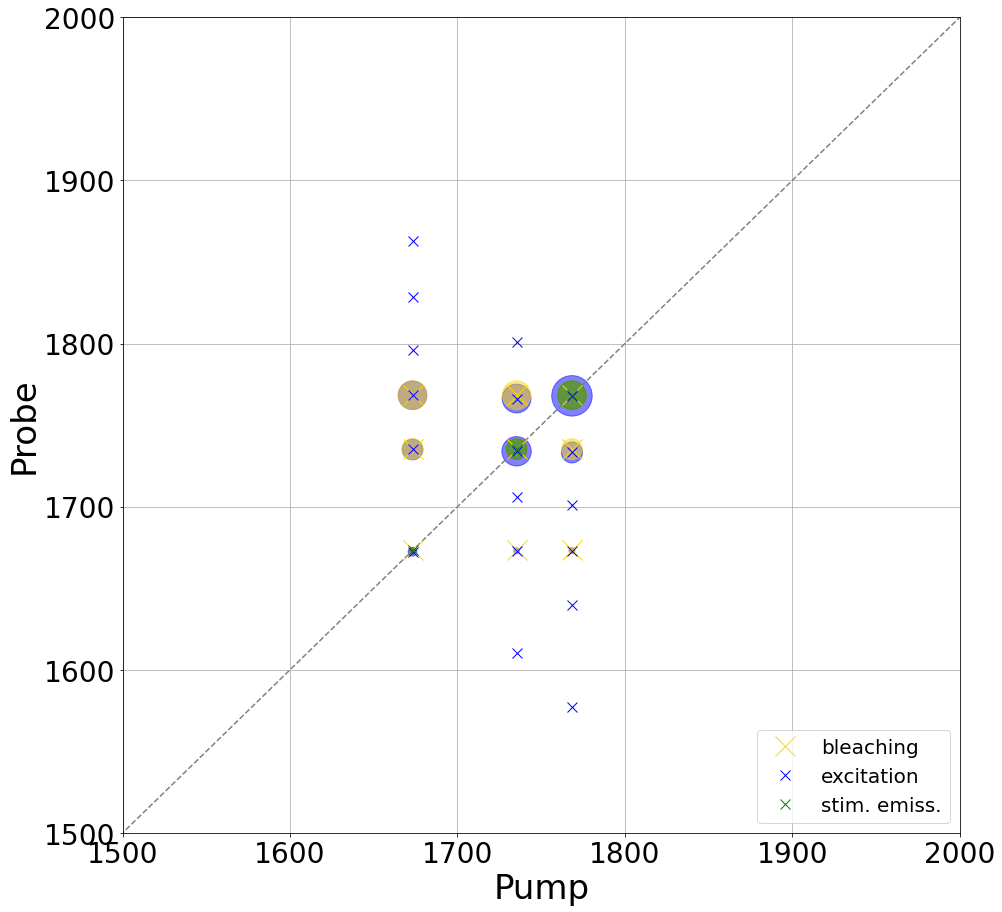

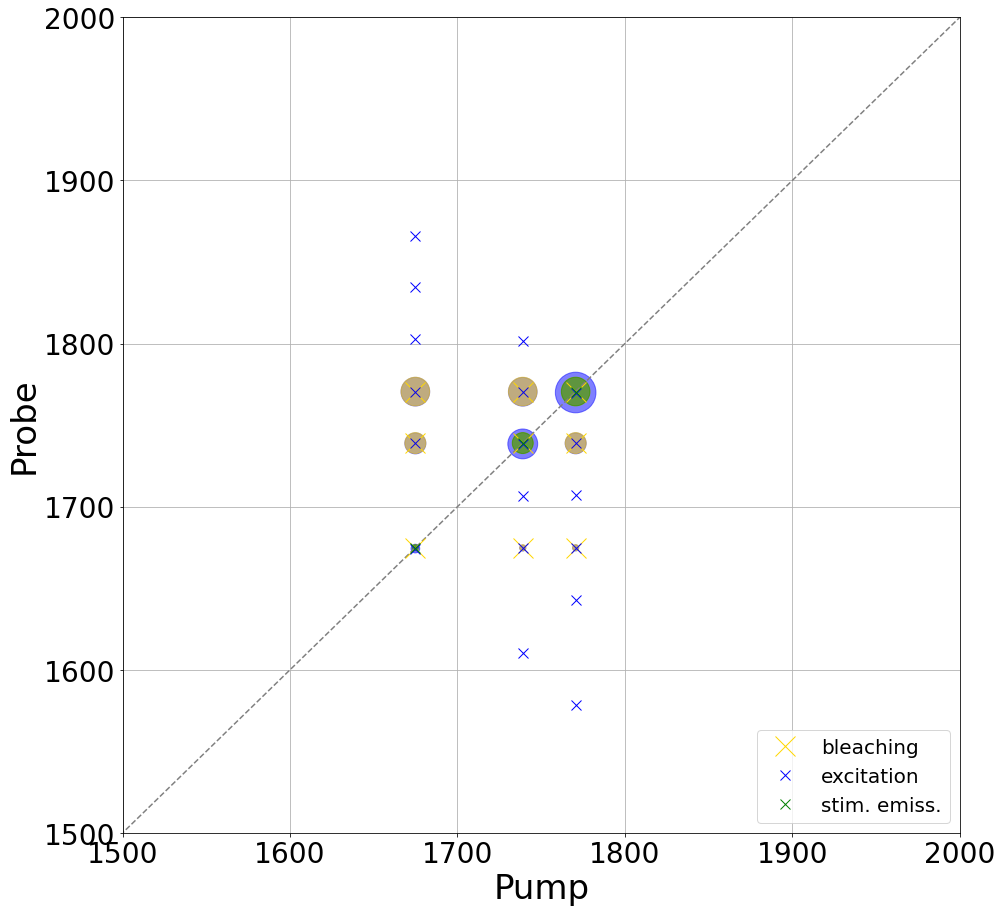

In [4]:
spec.plot_2dspectrum_dots(newmin,newmax,ble_x,ble_y,ble_i,exc_x,exc_y,exc_i,emi_x,emi_y,emi_i)
#plt.savefig('%s_anharm.png' %(mol),bbox_inches='tight')

if harm:
    spec.plot_2dspectrum_dots(newmin,newmax,ble_xh,ble_yh,ble_ih,exc_xh,exc_yh,exc_ih,emi_xh,emi_yh,emi_ih)
    #plt.savefig('%s_harm.png' %(mol),bbox_inches='tight')

### Plot 2D spectrum

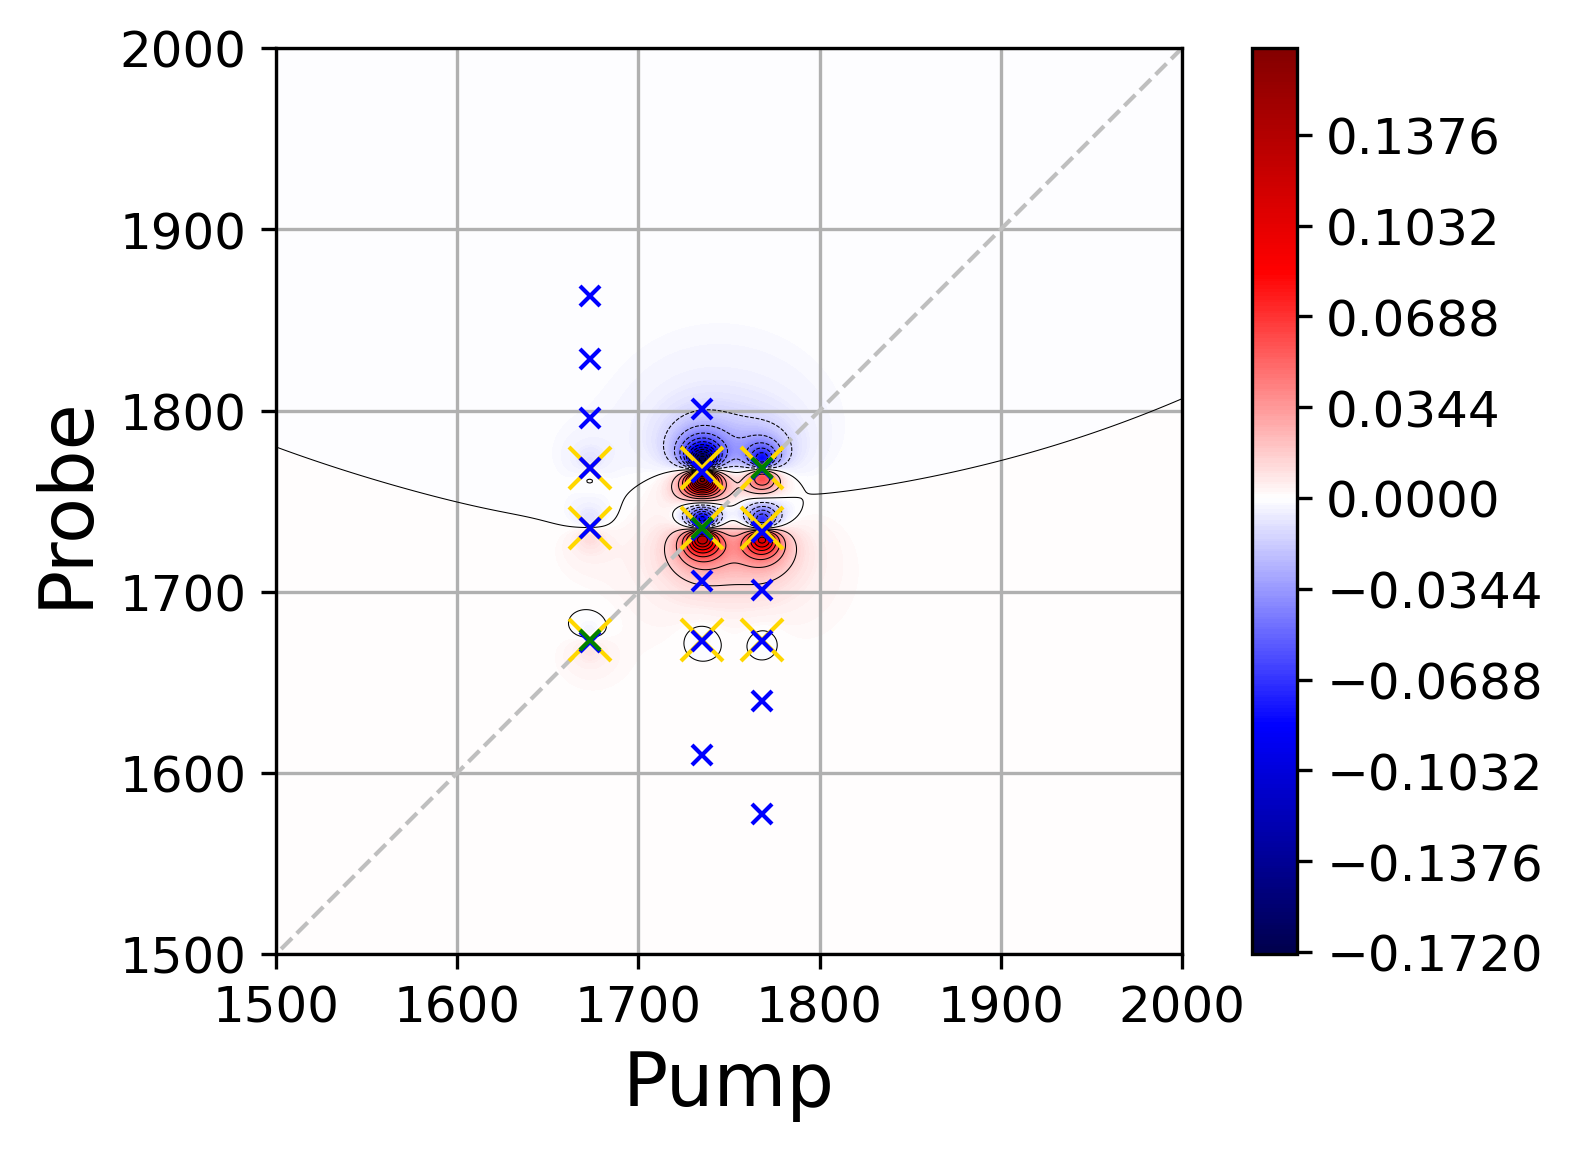

In [16]:
fig, ax = plt.subplots(dpi=300)
plt.plot([0,newmax], [0,newmax], ls="--", c="0.75", linewidth=1)

plt.grid(True)
ax.set_aspect(1./ax.get_data_ratio())

fig = plt.contourf(x,y,z, 500, alpha=1, cmap=plt.cm.seismic, vmax=z_val, vmin=-z_val)
CS = plt.contour(x,y,z,25,colors='k',linewidths=.25)

cbar = plt.colorbar(fig)
cbar.ax.tick_params(labelsize=12)
ax.tick_params(labelsize=12)
plt.xlabel('Pump', fontsize=18)
plt.ylabel('Probe', fontsize=18)
plt.xlim(newmin,newmax)
plt.ylim(newmin,newmax)

plt.plot(ble_x,ble_y, "x", color='gold', label='bleaching', markersize=10)
plt.plot(exc_x,exc_y, "bx", label='excitation', markersize=5)
plt.plot(emi_x,emi_y, "gx", label='stim. emiss.', markersize=5)


#plt.savefig('%s_anharm_lorentz.png' %(mol),bbox_inches='tight')

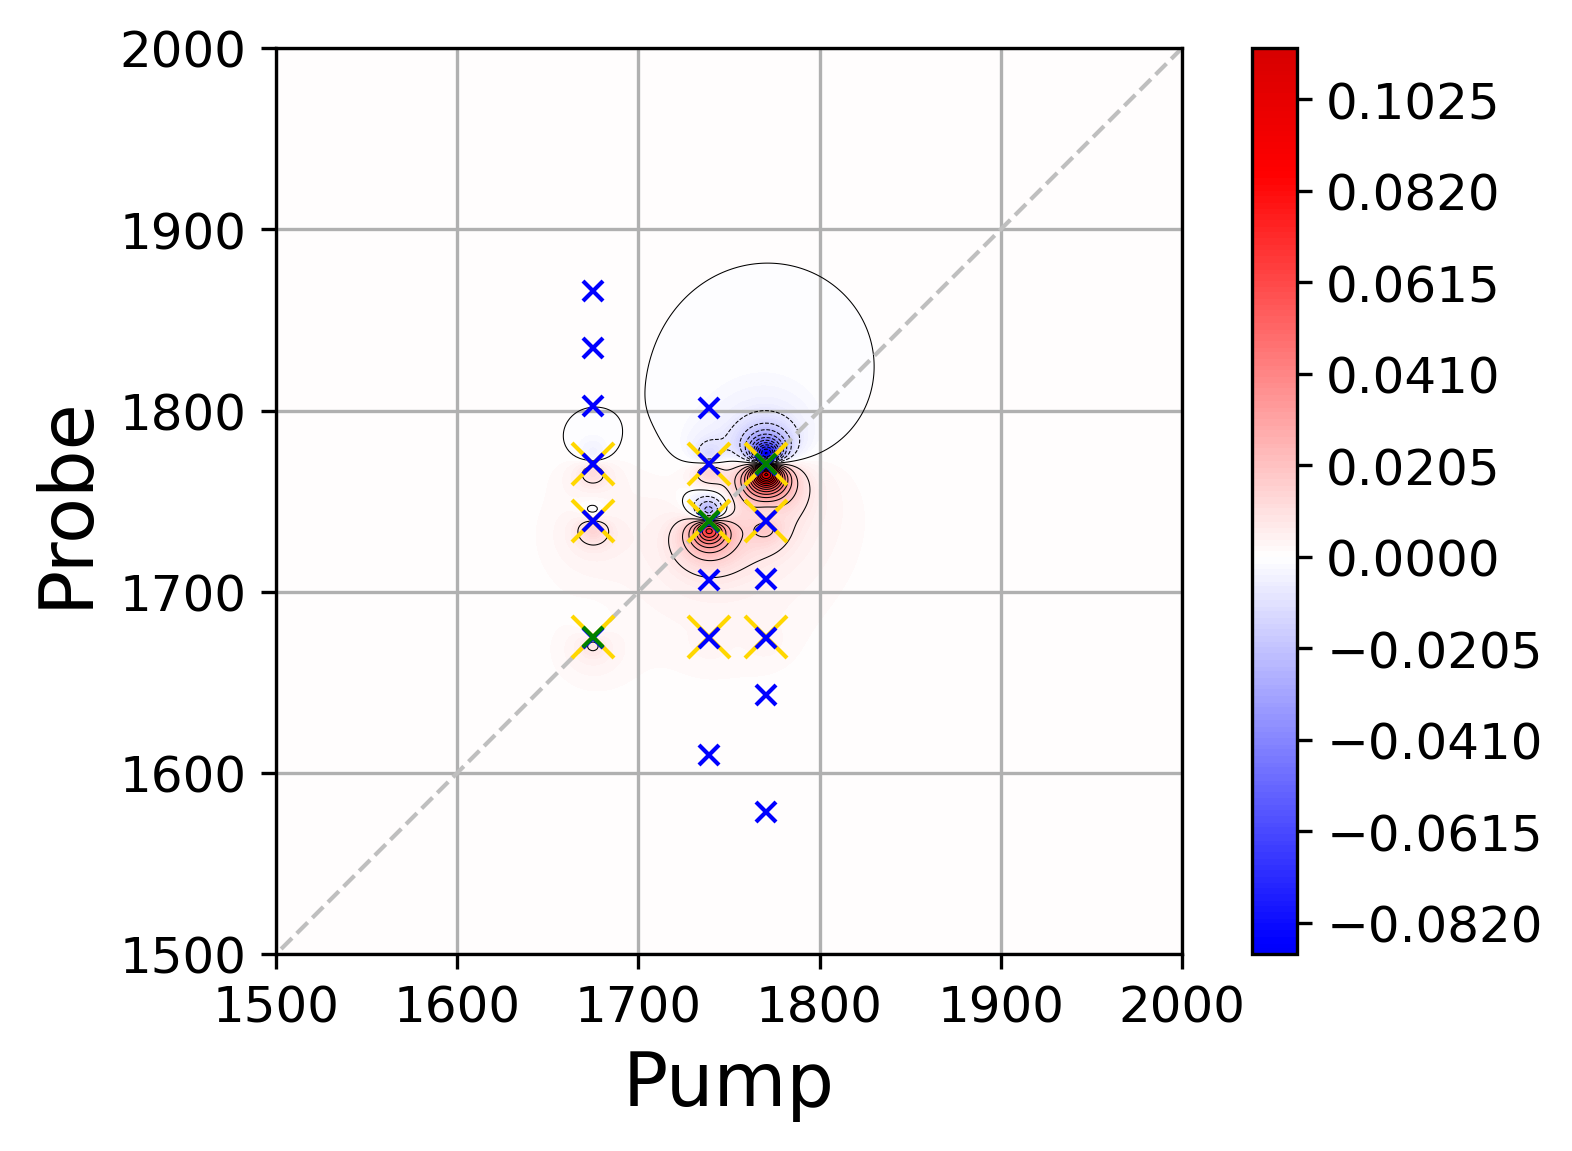

In [17]:
if harm:
    fig, ax = plt.subplots(dpi=300)
    plt.plot([0,newmax], [0,newmax], ls="--", c="0.75", linewidth=1)

    plt.grid(True)
    ax.set_aspect(1./ax.get_data_ratio())

    fig = plt.contourf(xh,yh,zh, 500, alpha=1, cmap=plt.cm.seismic, vmax=z_val, vmin=-z_val)
    CS = plt.contour(xh,yh,zh,25,colors='k',linewidths=.25)

    cbar = plt.colorbar(fig)
    cbar.ax.tick_params(labelsize=12)
    ax.tick_params(labelsize=12)
    plt.xlabel('Pump', fontsize=18)
    plt.ylabel('Probe', fontsize=18)
    plt.xlim(newmin,newmax)
    plt.ylim(newmin,newmax)

    plt.plot(ble_xh,ble_yh, "x", color='gold', label='bleaching', markersize=10)
    plt.plot(exc_xh,exc_yh, "bx", label='excitation', markersize=5)
    plt.plot(emi_xh,emi_yh, "gx", label='stim. emiss.', markersize=5)


    #plt.savefig('%s_harm_lorentz.png' %(mol),bbox_inches='tight')